### TAXI FARE IN NYC

SUP GRETE

toimetame oma andmeteaduse projektiga siin 

In [2]:
import pandas as pd

df = pd.read_csv('data.csv',low_memory=False)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [3]:
# store_and_fwd_flag oli ainuke täheline seega muutsin ära et kõik oleks numbri väljad
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,0.0,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,0.0,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,0.0,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,0.0,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,0.0,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
df.isnull().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

## different patterns


loeme, et kolmap, neljap ja reede sõidetakse kõige rohkem (ei olegi nädalavahetus)

samuti näeb mis kellaaegadel kõige rohkem sõidetakse

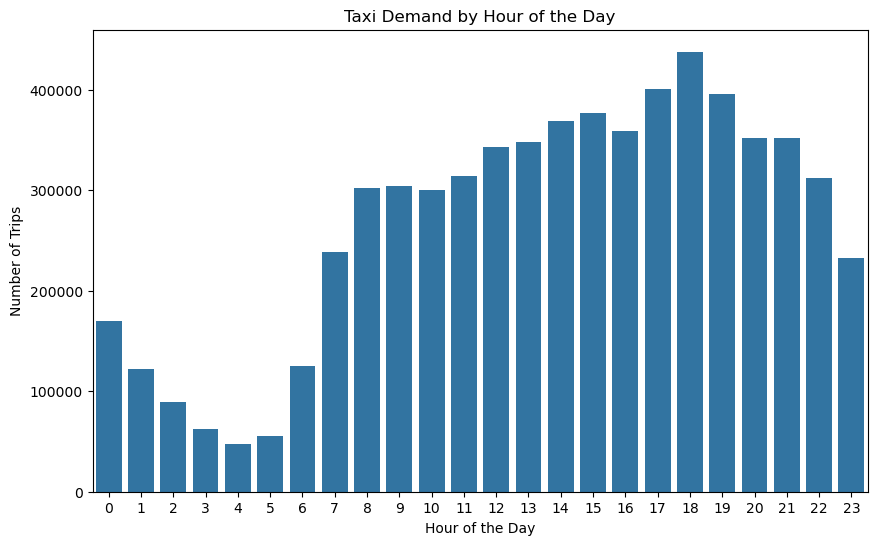

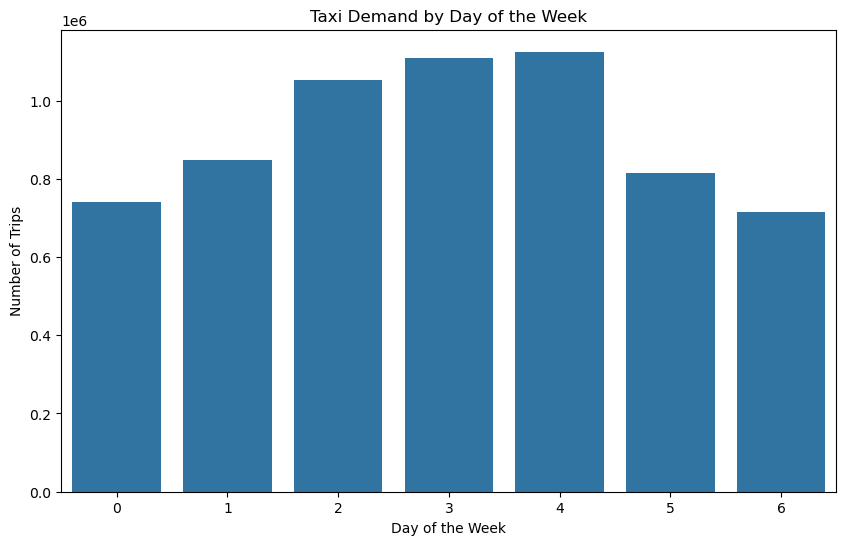

In [6]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek  # esmaspöev=0, pühapäev=6
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_hour', data=df)
plt.title('Taxi Demand by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.show()

# Plot trips per day of the week (weekday demand)
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_day', data=df)
plt.title('Taxi Demand by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

LISASIN NEED ZONED KA MAIN DF FAILI

In [8]:
# see on see erinevate takso tsoonide fail (et kus kandis asuvad mingid tsoonid)
zone_lookup = pd.read_csv('taxi-zone-lookup.csv')

#merge
df = df.merge(zone_lookup, how='left', left_on='PULocationID', right_on='LocationID', suffixes=('', '_pickup'))
df.rename(columns={'Zone': 'Pickup_Zone', 'Borough': 'Pickup_Borough'}, inplace=True)

# Drop the redundant locationID column from the pickup merge
df.drop(['LocationID'], axis=1, inplace=True)

#merge
df = df.merge(zone_lookup, how='left', left_on='DOLocationID', right_on='LocationID', suffixes=('', '_dropoff'))
df.rename(columns={'Zone': 'Dropoff_Zone', 'Borough': 'Dropoff_Borough'}, inplace=True)

# Drop the redundant locationID column from the drop-off merge
df.drop(['LocationID'], axis=1, inplace=True)
df = df.drop(columns=[col for col in df.columns if col.endswith('_x') or col.endswith('_y')])

In [9]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,pickup_day,pickup_month,Pickup_Borough,Pickup_Zone,Dropoff_Borough,Dropoff_Zone
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,0.0,238,239,1.0,...,0.3,11.27,2.5,0,2,1,Manhattan,Upper West Side North,Manhattan,Upper West Side South
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,0.0,239,238,1.0,...,0.3,12.30,2.5,0,2,1,Manhattan,Upper West Side South,Manhattan,Upper West Side North
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,0.0,238,238,1.0,...,0.3,10.80,2.5,0,2,1,Manhattan,Upper West Side North,Manhattan,Upper West Side North
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,0.0,238,151,1.0,...,0.3,8.16,0.0,0,2,1,Manhattan,Upper West Side North,Manhattan,Manhattan Valley
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,0.0,193,193,2.0,...,0.3,4.80,0.0,0,2,1,Queens,Queensbridge/Ravenswood,Queens,Queensbridge/Ravenswood


TEKITASIN ZONEDE csv FAILI KOOS KOORDINAATIDEGA (aga need praegu borough järgi -> peab veel mõtisklem kas meil zonede järgi hoopis vaja)

In [11]:
zone_lookup = pd.read_csv("taxi-zone-lookup.csv")

coordinates = {
    'Queens': (40.7282, -73.7949),
    'EWR': (40.6895, -74.1745),           
    'Bronx': (40.8448, -73.8648),
    'Manhattan': (40.7685, -73.9822),
    'Staten Island': (40.5795, -74.1502),
    'Brooklyn': (40.6782, -73.9442),
    'Unknown': (None, None)                
}


zone_lookup['Latitude'] = zone_lookup['Borough'].map(lambda x: coordinates.get(x, (None, None))[0])
zone_lookup['Longitude'] = zone_lookup['Borough'].map(lambda x: coordinates.get(x, (None, None))[1])

zone_lookup.head()

,LocationID,Borough,Zone,Latitude,Longitude
0,1,EWR,Newark Airport,40.6895,-74.1745
1,2,Queens,Jamaica Bay,40.7282,-73.7949
2,3,Bronx,Allerton/Pelham Gardens,40.8448,-73.8648
3,4,Manhattan,Alphabet City,40.7685,-73.9822
4,5,Staten Island,Arden Heights,40.5795,-74.1502


EI TÖÖTA VEEL LIIGA HÄSTI, SEST PMST KÕIK MAIN PICKUP JA DROPOFF ON MANHATTAINS, NIIET PEAB IKKAGI TÕENÄOLISELT ZONE KOORDINAATIDEGA TEGEMA

+ uuri geojson-ide kohta -> https://github.com/codeforgermany/click_that_hood/blob/main/public/data/queens.geojson

In [13]:
import pandas as pd
import folium
from collections import Counter

location_mapping = zone_lookup.set_index('LocationID')[['Latitude', 'Longitude']].dropna().to_dict('index')

# Calculate the top 10 pickup and drop-off locations by PULocationID and DOLocationID
pickup_counts = df['PULocationID'].value_counts().head(10)
dropoff_counts = df['DOLocationID'].value_counts().head(10)

print("Top 10 Pickup Locations (PULocationID):")
print(pickup_counts)
print("\nTop 10 Dropoff Locations (DOLocationID):")
print(dropoff_counts)

# Create a map centered on NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add markers for the top 10 pickup locations
for loc_id, count in pickup_counts.items():
    if loc_id in location_mapping:
        lat, lon = location_mapping[loc_id]['Latitude'], location_mapping[loc_id]['Longitude']
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f'Pickup Zone ID: {loc_id}\nTrips: {count}'
        ).add_to(nyc_map)

# Add markers for the top 10 drop-off locations
for loc_id, count in dropoff_counts.items():
    if loc_id in location_mapping:
        lat, lon = location_mapping[loc_id]['Latitude'], location_mapping[loc_id]['Longitude']
        folium.CircleMarker(
            location=[lat, lon],
            radius=5,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6,
            popup=f'Dropoff Zone ID: {loc_id}\nTrips: {count}'
        ).add_to(nyc_map)

nyc_map

Top 10 Pickup Locations (PULocationID):
PULocationID
237    292989
161    282213
236    272592
162    235602
186    228746
230    228553
132    214221
170    195027
48     194173
142    193689
Name: count, dtype: int64

Top 10 Dropoff Locations (DOLocationID):
DOLocationID
236    289289
237    263588
161    249719
170    196877
162    194146
230    193886
142    179701
48     171026
239    170047
141    168044
Name: count, dtype: int64


In [14]:
unique_b = zone_lookup['Borough'].unique()
print(unique_b)

['EWR' 'Queens' 'Bronx' 'Manhattan' 'Staten Island' 'Brooklyn' 'Unknown']
